# Flood Frequency Analysis

Mitch Creelman

## Import Packages

In [47]:
import dataretrieval.nwis as nwis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Variables

In [48]:
# site number (add more for repeated layers)
usgs_site = ['13042500']

# dates of observation
start_date = '1970-10-01'
end_date = '2020-09-30'

#label color (set to black if you have a white backgroun)
lab_clr = 'white'


## Pull the Data

In [49]:
# load in the flow data
df = nwis.get_record(sites = usgs_site , # input the site numbers
    service = 'dv' , # dv for daily values
    start = start_date , end = end_date, # start and end dates
    ) 



In [50]:
print(f'\n data types by column' )
display(df.dtypes)

print(f'\n data structure type' )
display(type(df))

print(f'\n Dataset Information' )
display(df.info())

print(f'List of different variables in each class: \n')
display(df.nunique())

print(f'\n Sample Statistics' )
display(df.describe())

print(f'\n Random Sample' )
display(df.sample(15))


 data types by column


00060_Mean       float64
00060_Mean_cd     object
site_no           object
dtype: object


 data structure type


pandas.core.frame.DataFrame


 Dataset Information
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18263 entries, 1970-10-01 00:00:00+00:00 to 2020-09-30 00:00:00+00:00
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   00060_Mean     18263 non-null  float64
 1   00060_Mean_cd  18263 non-null  object 
 2   site_no        18263 non-null  object 
dtypes: float64(1), object(2)
memory usage: 570.7+ KB


None

List of different variables in each class: 



00060_Mean       1275
00060_Mean_cd       2
site_no             1
dtype: int64


 Sample Statistics


,00060_Mean
count,18263.000000
mean,642.285555
std,449.101776
min,1.100000
25%,291.000000
50%,549.000000
75%,879.500000
max,2990.000000



 Random Sample


,00060_Mean,00060_Mean_cd,site_no
datetime,,,
2002-02-20 00:00:00+00:00,114.0,A,13042500
2018-06-09 00:00:00+00:00,796.0,A,13042500
2018-12-19 00:00:00+00:00,508.0,A,13042500
2009-10-10 00:00:00+00:00,363.0,A,13042500
1997-10-30 00:00:00+00:00,956.0,A,13042500
2013-08-03 00:00:00+00:00,1060.0,A,13042500
1978-11-07 00:00:00+00:00,229.0,A,13042500
2018-05-12 00:00:00+00:00,935.0,A,13042500
2003-10-05 00:00:00+00:00,181.0,A,13042500


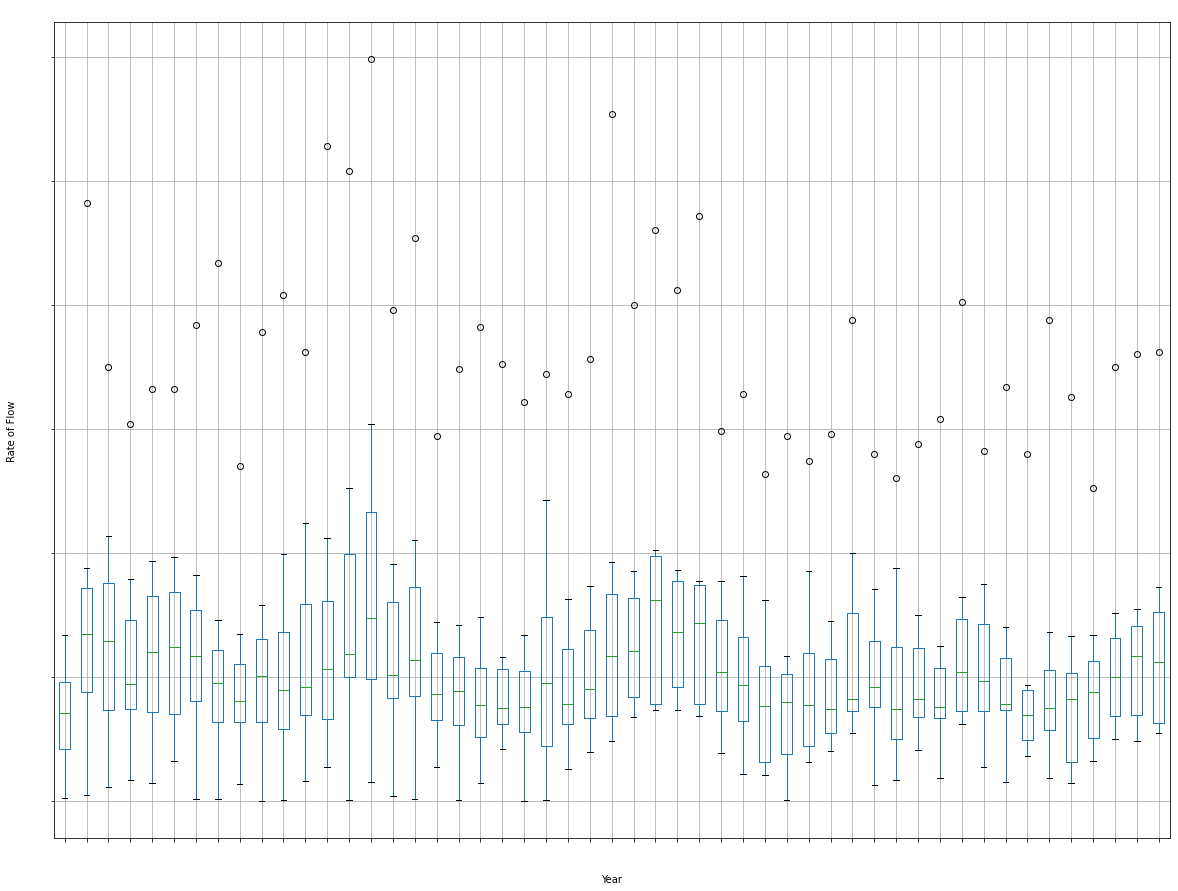

In [51]:
from logging.handlers import RotatingFileHandler
from turtle import color


fig = plt.figure(figsize = (20,15))
df['00060_Mean'].groupby(df.index.year).describe().T.boxplot()
ax = plt.gca()
plt.title('Yearly Distribution of Flows' , color = lab_clr)
plt.xticks(color = lab_clr)
plt.xlabel('Year')
plt.tick_params(axis='x', labelrotation = 45)
plt.ylabel('Rate of Flow')
plt.yticks(color = lab_clr)
plt.show()

In [52]:
# 
q_ams = df['00060_Mean'].groupby(df.index.year).max().values # group the values by year
q_ams_sorted = np.sort(q_ams) # sort from high to low

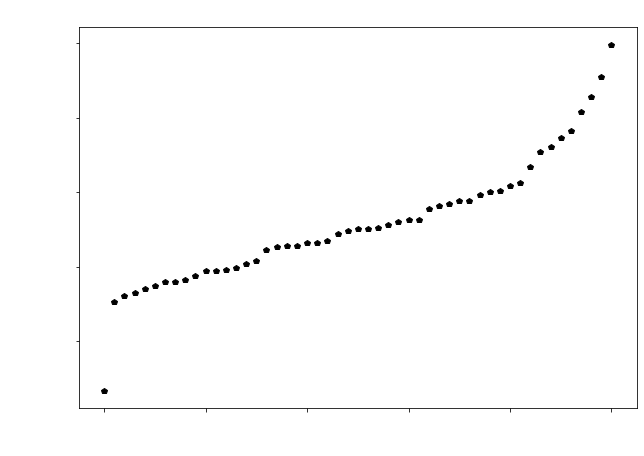

<Figure size 432x288 with 0 Axes>

In [75]:
plt.figure(figsize = (10,7))
plt.plot(q_ams_sorted, 'kp')


ax = plt.gca()
plt.rcParams.update({'font.size': 16})
plt.title(f'Maximum Annual Flow Series at Site {usgs_site[0]}' , color = lab_clr)
plt.xticks(color = lab_clr)
plt.xlabel('Flow Rank (Low to High)', color = lab_clr)
plt.ylabel('Annual Maximum Flow [ft$^3/s$]', color = lab_clr)
plt.yticks(color = lab_clr)
plt.show()
plt.savefig('AnnualMaxFlow.png', dpi = 300)